In [1]:
%%capture
!pip install qldpc
!pip install matplotlib

# Logical vs. physical error rates in a code capacity model

- Physical errors are sampled by flipping each bit (or qubit) with some probability.
- The logical error is the fraction of physical errors that are decoded incorrectly, resulting in a logical error.

In [2]:
from typing import Sequence

import matplotlib.pyplot as plt
import numpy as np

from qldpc import codes

In [3]:
def make_figure(
    codes: Sequence[codes.ClassicalCode | codes.CSSCode],
    num_samples: int = 10**3,
    physical_rates: Sequence[float] = list(np.logspace(-2, -0.1, 100)),
    figsize: tuple[int, int] = (4, 3),
    **decoding_args: object,
) -> tuple[plt.Figure, plt.Axes]:
    """Make a figure comparing physical vs. logical error rates in a code family."""
    figure, axis = plt.subplots(figsize=figsize)

    for code in codes:
        distance = code.get_distance()
        get_logical_error_rate = code.get_logical_error_rate_func(
            num_samples, max(physical_rates), **decoding_args
        )
        logical_rates, stderrs = get_logical_error_rate(physical_rates)
        line, *_ = axis.plot(physical_rates, logical_rates, label=f"$d={distance}$")
        axis.fill_between(
            physical_rates,
            logical_rates - stderrs,
            logical_rates + stderrs,
            color=line.get_color(),
            alpha=0.2,
        )

    axis.plot(physical_rates, physical_rates, "k:", label=r"$p_{\mathrm{log}}=p_{\mathrm{phys}}$")
    axis.set_xlabel(r"physical error rate $p_{\mathrm{phys}}$")
    axis.set_ylabel(r"logical error rate $p_{\mathrm{log}}$")
    axis.set_xscale("log")
    axis.set_yscale("log")
    axis.set_xlim(min(physical_rates), 1)
    axis.set_ylim(min(physical_rates) ** 2, 1)
    axis.legend(loc="best")
    figure.tight_layout()

    return figure, axis

### Plot logical vs. physical error rates for the classical repetition code and quantum surface code

Decode with minimum-weight perfect matching (MWPM) because these codes have no threshold with the default decoder (BP-OSD).

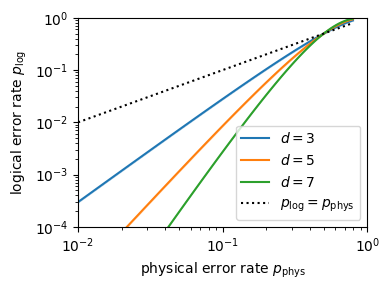

In [4]:
rep_codes = [codes.RepetitionCode(dist) for dist in [3, 5, 7]]
make_figure(rep_codes, with_MWPM=True)
plt.show()

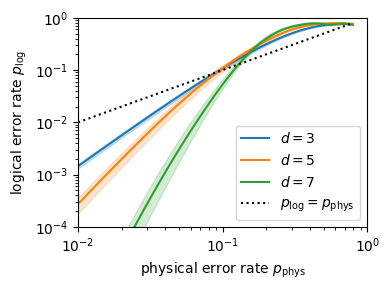

In [5]:
surface_codes = [codes.SurfaceCode(dist) for dist in [3, 5, 7]]
make_figure(surface_codes, with_MWPM=True)
plt.show()